<a href="https://colab.research.google.com/github/sushily1997/Project_1/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description**

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

###**Variables Description**

This dataframe contains 8 variables that correspond to:

######**InvoiceNo** Invoice number. **Nominal**, a six digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation**

######**tockCode** Product (item) code. **Nominal**, a five digit integral number uniquely assigned to each distinct product

######**Description** Product (item) name. **Nominal**

######**Quantity** The quantities of each product (item) per transaction. **Numeric**

######**InvoiceDate** Invoice Date and time.**Numeric**, the day and time when each transaction was generated

######**UnitPrice** Unit price. **Numeric**, product price per unit in sterling

######**CustomerID** Customer number. **Nominal**, a six digit integral number uniquely assigned to each customer

######**Country** Country name. **Nominal**, the name of the country where each customer resides

In [106]:

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering




In [107]:
#load the dataset
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx', sheet_name='Online Retail')

In [108]:
#shape of our dataset
print("The shape of our dataset is: ",df.shape)

The shape of our dataset is:  (541909, 8)


In [109]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [110]:
#check the head of the dataset
print(f'The shape of the data is {df.shape}')
df.head(10)


The shape of the data is (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [111]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [112]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [113]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Text(0.5, 1.0, 'Ratio of missing values per columns')

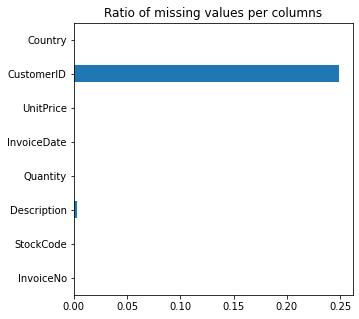

In [114]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [115]:
#df.dropna(inplace=True)
#df.shape

In [116]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB



Our dataset is composed of **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

In [117]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [118]:
now = dt.date(2011,12,9)
print(f'Date of Reference: {now}')
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())

Date of Reference: 2011-12-09


In [119]:
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,54.08


In [120]:
recency_df = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [121]:
oldcust_df = df.groupby(by='CustomerID', as_index=False)['Date'].min()
oldcust_df.columns = ['CustomerID','FirstPurshaceDate']
oldcust_df['OldCust'] = oldcust_df['FirstPurshaceDate'].apply(lambda x: (now - x).days)
oldcust_df.drop('FirstPurshaceDate',axis=1,inplace=True)

oldcust_df.head()

,CustomerID,OldCust
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310


In [122]:
#exploring the unique values of each attribute
print("Number of transactions: ",df['InvoiceNo'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Note:** The number of NA customers is quite large and that would impact the results.

In [123]:
df.isna().sum(axis=0).sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Date                0
TotalCost           0
dtype: int64

In [124]:
#Checking the stats of all the columns
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantities (with corresponding UnitPrice values) was returned or cancelled.


##**Verify Assumption: Cancelled invoices**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: -80995.

We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [125]:
#get cancelled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96


In [126]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-09,-168469.6


In [127]:
cancelled_orders[cancelled_orders['Quantity']>0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost


In [128]:
cancelled_orders[cancelled_orders['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011-12-09,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011-12-09,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011-12-09,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011-12-09,-1.25


As we expected, negative values in the Quantity column, mean that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

**How much cancelled orders do we have**

In [129]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders =df['InvoiceNo'].nunique()

We have  9288  cancelled orders.


In [130]:
#percentage of cancelled orders in total orders
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 9288/25900 (35.86%) 


We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.




##**Explore Basket/Orders**

**a) What's the average number of orders per customer?**

In [131]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [132]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer is 5.

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

**b) What's the average number of unique items per order?**

In [133]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [134]:
groupby_invoice.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [135]:
df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()


count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [136]:
temp_df =df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [137]:
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


As images speak more, let's see what the distribution of productsNumber tells us.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


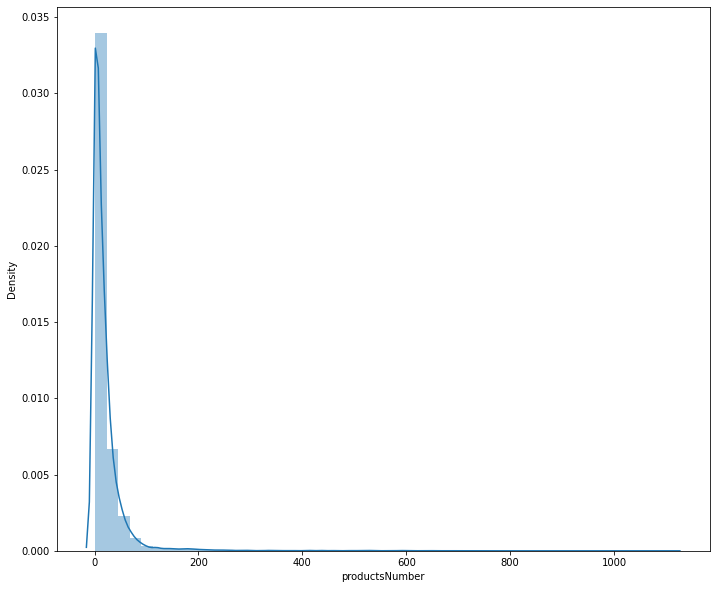

In [138]:
#Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()

We have a skewed distribution of products. Most people buy less than 25 items.

In [149]:
df1=df.dropna(subset=['CustomerID','Description'],how = 'any', inplace = True)
print(f'The shape of the data is {df.shape}')
print("Null Values in each Column:")
df.isna().sum(axis=0).sort_values(ascending=False)

The shape of the data is (392692, 10)
Null Values in each Column:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
TotalCost      0
dtype: int64

In [140]:
print(f"The number of duplicates in the dataset is {df.duplicated(keep='first').sum(axis = 0)}")
df.drop_duplicates(inplace=True)
print(f"Duplicates Dropped...\nThe number of duplicates in the dataset now is {df.duplicated(keep='first').sum(axis = 0)}")

The number of duplicates in the dataset is 5225
Duplicates Dropped...
The number of duplicates in the dataset now is 0


In the above code all the rows missing the value of CustomerID and the description of the products are identified and dropped.
Also the duplicates are searched among the data and only a single copy is backed.

In [141]:
print('Number of transaction: ',df['InvoiceNo'].nunique())
print('Number of unique products: ',df['StockCode'].nunique())
print('Number of customers: ',df['CustomerID'].nunique())

Number of transaction:  22190
Number of unique products:  3684
Number of customers:  4372


In [142]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Description    ZINC WIRE SWEETHEART LETTER TRAY
Quantity                                  80995
InvoiceDate                 2011-12-09 12:50:00
UnitPrice                               38970.0
CustomerID                              18287.0
Country                             Unspecified
Date                                 2011-12-09
TotalCost                              168469.6
dtype: object

In [143]:
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Description     4 PURPLE FLOCK DINNER CANDLES
Quantity                               -80995
InvoiceDate               2010-12-01 08:26:00
UnitPrice                                 0.0
CustomerID                            12346.0
Country                             Australia
Date                               2010-12-01
TotalCost                           -168469.6
dtype: object

In [144]:
df['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [145]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['CustomerID'].notnull()]
print(df.shape)
df.isnull().sum()

(392692, 10)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
TotalCost      0
dtype: int64

In [146]:
df.nsmallest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,2011-04-15,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,2011-07-26,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,2011-09-25,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,2011-09-26,0.001
217060,555876,16045,POPART WOODEN PENCILS ASST,100,2011-06-07 15:28:00,0.040,15799.0,United Kingdom,2011-06-07,4.000
221726,556267,16045,POPART WOODEN PENCILS ASST,500,2011-06-09 19:33:00,0.040,13694.0,United Kingdom,2011-06-09,20.000
228959,557006,16045,POPART WOODEN PENCILS ASST,100,2011-06-16 11:29:00,0.040,14282.0,United Kingdom,2011-06-16,4.000
229052,557009,16045,POPART WOODEN PENCILS ASST,100,2011-06-16 11:38:00,0.040,14321.0,United Kingdom,2011-06-16,4.000
229499,557057,16045,POPART WOODEN PENCILS ASST,100,2011-06-16 14:46:00,0.040,16843.0,United Kingdom,2011-06-16,4.000
233805,557492,16045,POPART WOODEN PENCILS ASST,100,2011-06-20 15:08:00,0.040,13717.0,United Kingdom,2011-06-20,4.000


In [147]:
df.nlargest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011-05-03,8142.75
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,2011-10-27,4161.06
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,2011-10-27,4161.06
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,2011-10-19,3949.32
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom,2011-10-03,3155.95
297438,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom,2011-08-11,2500.00
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2011-04-04,2382.92
406407,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore,2011-10-19,2118.74
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2011-04-04,2053.07
343000,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom,2011-09-15,2033.10
